# IBM - Applied Data Science Capstone
### Week 4 - The Battle of Neighborhoods
#### Author: Rodrigo Eiras
##### [rodrigoeiras.github.io](https://rodrigoeiras.github.io)

### The present work takes place in Rio de Janeiro / Brazil

![RJ](37110.jpg)

### Business Problem and Data Sources

#### The main problem here is try to answer what neighborhood in Rio de Janeiro is interesting to establish a new english school from a international franchise that not have good knowledge about the city. The present work uses data coming from the Foursquare API to locate and identify venues around the neighborhoods and census data from the city of Rio de Janeiro stored in Wikipedia.

---------------------------------------------

## Part 1: Importing and Cleaning Data from Wikipedia - Data Loading and Data Wrangling

----------------


### > Creating the data frame from Wikipedia about Rio de Janeiro census data

### >> Installing required packages

In [1]:
!pip install beautifulsoup4
!pip install lxml

     |████████████████████████████████| 122kB 6.2MB/s eta 0:00:01
     |████████████████████████████████| 5.5MB 4.4MB/s eta 0:00:01


### >> Importing libraries to manipulate data

In [2]:
import requests
import urllib.request
import time
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

### >> Remove warnings output

In [3]:
import warnings
warnings.filterwarnings('ignore')

### >> Downloading the wikipedia page that contains data from Rio de Janeiro neighborhoods

In [4]:
website_url = requests.get('https://pt.wikipedia.org/wiki/Lista_de_bairros_do_Rio_de_Janeiro_por_IDH').text

### >> Parsing the HTML table to a DataFrame

In [5]:
soup = BeautifulSoup(website_url,'lxml')
#print(soup.prettify()) - Used to check the HTML

In [6]:
table = soup.find('table',{'class':'wikitable sortable'})

In [7]:
table_str = str(table)
df = pd.read_html(table_str)[0]

In [8]:
df.head()

,Nº,Bairro ou grupo de bairros,Esperançade vidaao nascer(em anos),Taxa de alfabe-tização de adultos (%),Taxa bruta defrequência escolar (%),Renda per capita (em R$ de 2000),Índice de Longe-vidade,Índice de Educação,Índice de Renda,Índice de Desenvol-vimento Humano
,Nº,Bairro ou grupo de bairros,Esperançade vidaao nascer(em anos),Taxa de alfabe-tização de adultos (%),Taxa bruta defrequência escolar (%),Renda per capita (em R$ de 2000),IDH-L,IDH-E,IDH-R,IDH
0,1,Gávea,8045.0,9808.0,"118,13[a]","2139,56 [b]",924.0,987.0,1000.0,0970
1,2,Leblon,7947.0,9901.0,"105,18[a]","2441,28[b]",908.0,993.0,1000.0,0967
2,3,Jardim Guanabara,8047.0,9892.0,"111,15[a]","1316,86[a]",924.0,993.0,972.0,0963
3,4,Ipanema,7868.0,9878.0,"107,98[a]","2465,45[b]",895.0,992.0,1000.0,0962
4,5,Lagoa,7791.0,9946.0,"115,26[a]","2955,29[b]",882.0,996.0,1000.0,0959


### >> Removing one level of the header as is duplicated and droping columns that will not be used

In [9]:
df.columns = df.columns.droplevel(0)

In [10]:
df = df.drop(df.columns[[2,3,4]], axis=1)

In [11]:
df.head()

,Nº,Bairro ou grupo de bairros,Renda per capita (em R$ de 2000),IDH-L,IDH-E,IDH-R,IDH
0,1,Gávea,"2139,56 [b]",924.0,987.0,1000.0,0970
1,2,Leblon,"2441,28[b]",908.0,993.0,1000.0,0967
2,3,Jardim Guanabara,"1316,86[a]",924.0,993.0,972.0,0963
3,4,Ipanema,"2465,45[b]",895.0,992.0,1000.0,0962
4,5,Lagoa,"2955,29[b]",882.0,996.0,1000.0,0959


### >> Removing hyperlinks boxes from the "Renda Per Capita" Column

In [12]:
df['Renda per capita (em R$ de 2000)'] = df['Renda per capita (em R$ de 2000)'].str.replace(r"[a-z[\]]",'')

In [13]:
df.head()

,Nº,Bairro ou grupo de bairros,Renda per capita (em R$ de 2000),IDH-L,IDH-E,IDH-R,IDH
0,1,Gávea,"2139,56",924.0,987.0,1000.0,0970
1,2,Leblon,"2441,28",908.0,993.0,1000.0,0967
2,3,Jardim Guanabara,"1316,86",924.0,993.0,972.0,0963
3,4,Ipanema,"2465,45",895.0,992.0,1000.0,0962
4,5,Lagoa,"2955,29",882.0,996.0,1000.0,0959


### >> Removing commas and white spaces to fix the values in "Renda per Capita" column

In [14]:
df['Renda per capita (em R$ de 2000)'] = (df['Renda per capita (em R$ de 2000)'].replace('\.','', regex=True)
                        .replace(',','', regex=True)
                        )

In [15]:
df['Renda per capita (em R$ de 2000)'] = df['Renda per capita (em R$ de 2000)'].str.replace(' ', '')

In [16]:
df.head()

,Nº,Bairro ou grupo de bairros,Renda per capita (em R$ de 2000),IDH-L,IDH-E,IDH-R,IDH
0,1,Gávea,213956,924.0,987.0,1000.0,0970
1,2,Leblon,244128,908.0,993.0,1000.0,0967
2,3,Jardim Guanabara,131686,924.0,993.0,972.0,0963
3,4,Ipanema,246545,895.0,992.0,1000.0,0962
4,5,Lagoa,295529,882.0,996.0,1000.0,0959


### >> Removing cents from "Renda per Capita" column to make it easier to evaluate

In [17]:
df['Renda per capita (em R$ de 2000)'] = df['Renda per capita (em R$ de 2000)'].astype(str).str[:-2]

In [18]:
df.head()

,Nº,Bairro ou grupo de bairros,Renda per capita (em R$ de 2000),IDH-L,IDH-E,IDH-R,IDH
0,1,Gávea,2139,924.0,987.0,1000.0,0970
1,2,Leblon,2441,908.0,993.0,1000.0,0967
2,3,Jardim Guanabara,1316,924.0,993.0,972.0,0963
3,4,Ipanema,2465,895.0,992.0,1000.0,0962
4,5,Lagoa,2955,882.0,996.0,1000.0,0959


In [19]:
print(df.dtypes)

Nº                                   object
Bairro ou grupo de bairros           object
Renda per capita (em R$ de 2000)     object
IDH-L                               float64
IDH-E                               float64
IDH-R                               float64
IDH                                  object
dtype: object


In [20]:
pd.set_option('display.max_rows', 200)

### >> Renaming Columns

In [21]:
df = df.rename(columns={"Nº": "Number", "Bairro ou grupo de bairros": "Neighborhood", "Renda per capita (em R$ de 2000)": "Per Capita Income - BRL"})

### >> Spliting rows that has values separared by commas to new rows

In [22]:
df = (df.set_index(df.columns.drop('Neighborhood',1).tolist())
   .Neighborhood.str.split(',', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'Neighborhood'})
   .loc[:, df.columns]
   )

### >> Drop cells with a "-" in column "Number"

In [23]:
df_dropna = df[df.Number != "—"].reset_index(drop=True)

### >> Fixing the neighborhood name for "Mangueira" to better localization on the map

In [24]:
df_dropna["Neighborhood"] = df_dropna['Neighborhood'].replace(['Mangueira'],'Jamelão')

### >> Fixing "Freguesia" name that is duplicated

In [25]:
df_dropna['Number'] = df_dropna['Number'].astype(int)

In [26]:
df_dropna.loc[df_dropna['Number'] == 29, 'Neighborhood'] = "Freguesia (Ilha)"

### >> Casting all numeric columns to float and converting to percentages

In [27]:
df_dropna['Per Capita Income - BRL'] = df_dropna['Per Capita Income - BRL'].astype(str).astype(float)

In [28]:
print(df_dropna.dtypes)

Number                       int64
Neighborhood                object
Per Capita Income - BRL    float64
IDH-L                      float64
IDH-E                      float64
IDH-R                      float64
IDH                         object
dtype: object


In [29]:
df_dropna['IDH'] = df_dropna['IDH'].astype(str).astype(float)

In [30]:
df_dropna['IDH'] = df_dropna['IDH']/1000
df_dropna['IDH-R'] = df_dropna['IDH-R']/1000
df_dropna['IDH-E'] = df_dropna['IDH-E']/1000
df_dropna['IDH-L'] = df_dropna['IDH-L']/1000

In [31]:
df_dropna['IDH'] = df_dropna['IDH']*100
df_dropna['IDH-R'] = df_dropna['IDH-R']*100
df_dropna['IDH-E'] = df_dropna['IDH-E']*100
df_dropna['IDH-L'] = df_dropna['IDH-L']*100

In [32]:
df_dropna.head()

,Number,Neighborhood,Per Capita Income - BRL,IDH-L,IDH-E,IDH-R,IDH
0,1,Gávea,2139.0,92.4,98.7,100.0,97.0
1,2,Leblon,2441.0,90.8,99.3,100.0,96.7
2,3,Jardim Guanabara,1316.0,92.4,99.3,97.2,96.3
3,4,Ipanema,2465.0,89.5,99.2,100.0,96.2
4,5,Lagoa,2955.0,88.2,99.6,100.0,95.9


### >> Finished part 1. Writing the data frame to a CSV file

In [33]:
df.to_csv("rj_neighbors.csv", index=False)

_________

## Part 2: Geocoding

---------------------------


### > Geocoding Rio de Janeiro Addresses and Neighborhoods

### >> Importing libraries for geocoding

In [34]:
!pip install geopandas
!pip install geopy

     |████████████████████████████████| 972kB 5.2MB/s eta 0:00:01
     |████████████████████████████████| 1.8MB 27.8MB/s eta 0:00:01
     |████████████████████████████████| 14.7MB 7.0MB/s eta 0:00:011    |████████▊                       | 4.0MB 35.7MB/s eta 0:00:01     |██████████▌                     | 4.8MB 35.7MB/s eta 0:00:01     |███████████████████▏            | 8.8MB 35.7MB/s eta 0:00:01     |████████████████████████        | 11.0MB 35.7MB/s eta 0:00:01
     |████████████████████████████████| 10.9MB 17.1MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/d2/3d/fa76db83bf75c4f8d338c2fd15c8d33fdd7ad23a9b5e57eb6c5de26b430e/click-7.1.2-py2.py3-none-any.whl
  Found existing installation: pyproj 1.9.6
    Uninstalling pyproj-1.9.6:
      Successfully uninstalled pyproj-1.9.6
     |████████████████████████████████| 112kB 5.7MB/s eta 0:00:01


### >> Concatenating the Neighborhood to Rio de Janeiro and Brazil strings

In [35]:
df_dropna["Address"] = df_dropna['Neighborhood']+", "+"Rio de Janeiro"+", "+"Brazil"

In [36]:
df_dropna.head()

,Number,Neighborhood,Per Capita Income - BRL,IDH-L,IDH-E,IDH-R,IDH,Address
0,1,Gávea,2139.0,92.4,98.7,100.0,97.0,"Gávea, Rio de Janeiro, Brazil"
1,2,Leblon,2441.0,90.8,99.3,100.0,96.7,"Leblon, Rio de Janeiro, Brazil"
2,3,Jardim Guanabara,1316.0,92.4,99.3,97.2,96.3,"Jardim Guanabara, Rio de Janeiro, Brazil"
3,4,Ipanema,2465.0,89.5,99.2,100.0,96.2,"Ipanema, Rio de Janeiro, Brazil"
4,5,Lagoa,2955.0,88.2,99.6,100.0,95.9,"Lagoa, Rio de Janeiro, Brazil"


### >> Geocoding the Address from Rio de Janeiro neighborhoods

In [37]:
from geopy.extra.rate_limiter import RateLimiter
from geopy.geocoders import Nominatim

locator = Nominatim(user_agent="myGeocoder")

# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2- - create location column
df_dropna['location'] = df_dropna['Address'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
df_dropna['point'] = df_dropna['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
df_dropna[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df_dropna['point'].tolist(), index=df_dropna.index)

In [38]:
df_dropna.head()

,Number,Neighborhood,Per Capita Income - BRL,IDH-L,IDH-E,IDH-R,IDH,Address,location,point,latitude,longitude,altitude
0,1,Gávea,2139.0,92.4,98.7,100.0,97.0,"Gávea, Rio de Janeiro, Brazil","(Gávea, Zona Sul do Rio de Janeiro, Rio de Jan...","(-22.9814243, -43.2383245, 0.0)",-22.981424,-43.238324,0.0
1,2,Leblon,2441.0,90.8,99.3,100.0,96.7,"Leblon, Rio de Janeiro, Brazil","(Leblon, Zona Sul do Rio de Janeiro, Rio de Ja...","(-22.983556, -43.2249377, 0.0)",-22.983556,-43.224938,0.0
2,3,Jardim Guanabara,1316.0,92.4,99.3,97.2,96.3,"Jardim Guanabara, Rio de Janeiro, Brazil","(Jardim Guanabara, Zona Norte do Rio de Janeir...","(-22.8128362, -43.2007792, 0.0)",-22.812836,-43.200779,0.0
3,4,Ipanema,2465.0,89.5,99.2,100.0,96.2,"Ipanema, Rio de Janeiro, Brazil","(Ipanema, Zona Sul do Rio de Janeiro, Rio de J...","(-22.9839557, -43.2022163, 0.0)",-22.983956,-43.202216,0.0
4,5,Lagoa,2955.0,88.2,99.6,100.0,95.9,"Lagoa, Rio de Janeiro, Brazil","(Lagoa, Zona Sul do Rio de Janeiro, Rio de Jan...","(-22.9624658, -43.2024884, 0.0)",-22.962466,-43.202488,0.0


### >> Extracting the regions (zones) from the city

>>> Note that Rio de Janeiro doens't have "EAST" region since it is represented by the bay coast)
>>> * N = Norte
>>> * S = Sul
>>> * W = Oeste
>>> * Downtown = Central

>>> 

In [39]:
df_zones = df_dropna["location"].apply(pd.Series)

In [40]:
df_zones = df_zones[0].str.split(",").str[1]

In [41]:
df_zones = df_zones.str.split(" ").str[2]

In [42]:
df_dropna["Zones"] = df_zones

In [43]:
df_dropna.head()

,Number,Neighborhood,Per Capita Income - BRL,IDH-L,IDH-E,IDH-R,IDH,Address,location,point,latitude,longitude,altitude,Zones
0,1,Gávea,2139.0,92.4,98.7,100.0,97.0,"Gávea, Rio de Janeiro, Brazil","(Gávea, Zona Sul do Rio de Janeiro, Rio de Jan...","(-22.9814243, -43.2383245, 0.0)",-22.981424,-43.238324,0.0,Sul
1,2,Leblon,2441.0,90.8,99.3,100.0,96.7,"Leblon, Rio de Janeiro, Brazil","(Leblon, Zona Sul do Rio de Janeiro, Rio de Ja...","(-22.983556, -43.2249377, 0.0)",-22.983556,-43.224938,0.0,Sul
2,3,Jardim Guanabara,1316.0,92.4,99.3,97.2,96.3,"Jardim Guanabara, Rio de Janeiro, Brazil","(Jardim Guanabara, Zona Norte do Rio de Janeir...","(-22.8128362, -43.2007792, 0.0)",-22.812836,-43.200779,0.0,Norte
3,4,Ipanema,2465.0,89.5,99.2,100.0,96.2,"Ipanema, Rio de Janeiro, Brazil","(Ipanema, Zona Sul do Rio de Janeiro, Rio de J...","(-22.9839557, -43.2022163, 0.0)",-22.983956,-43.202216,0.0,Sul
4,5,Lagoa,2955.0,88.2,99.6,100.0,95.9,"Lagoa, Rio de Janeiro, Brazil","(Lagoa, Zona Sul do Rio de Janeiro, Rio de Jan...","(-22.9624658, -43.2024884, 0.0)",-22.962466,-43.202488,0.0,Sul


### >> Fixing some regions incorrectly labeled

In [44]:
df_dropna.loc[df_dropna['Number'] == 10, 'Zones'] = "Sul"
df_dropna.loc[df_dropna['Neighborhood'] == "Botafogo", 'Zones'] = "Sul"
df_dropna.loc[df_dropna['Neighborhood'] == "Maracanã", 'Zones'] = "Norte"
df_dropna.loc[df_dropna['Neighborhood'] == "Paquetá", 'Zones'] = "Norte"
df_dropna.loc[df_dropna['Neighborhood'] == "Manguinhos", 'Zones'] = "Norte"
df_dropna.loc[df_dropna['Neighborhood'] == "Jamelão", 'Zones'] = "Norte"

### >> Translating the regions

In [45]:
df_dropna.loc[df_dropna['Zones'] == "Sul", 'Zones'] = "South"
df_dropna.loc[df_dropna['Zones'] == "Norte", 'Zones'] = "North"
df_dropna.loc[df_dropna['Zones'] == "Central", 'Zones'] = "Downtown"
df_dropna.loc[df_dropna['Zones'] == "Oeste", 'Zones'] = "West"

In [46]:
df_dropna.head()

,Number,Neighborhood,Per Capita Income - BRL,IDH-L,IDH-E,IDH-R,IDH,Address,location,point,latitude,longitude,altitude,Zones
0,1,Gávea,2139.0,92.4,98.7,100.0,97.0,"Gávea, Rio de Janeiro, Brazil","(Gávea, Zona Sul do Rio de Janeiro, Rio de Jan...","(-22.9814243, -43.2383245, 0.0)",-22.981424,-43.238324,0.0,South
1,2,Leblon,2441.0,90.8,99.3,100.0,96.7,"Leblon, Rio de Janeiro, Brazil","(Leblon, Zona Sul do Rio de Janeiro, Rio de Ja...","(-22.983556, -43.2249377, 0.0)",-22.983556,-43.224938,0.0,South
2,3,Jardim Guanabara,1316.0,92.4,99.3,97.2,96.3,"Jardim Guanabara, Rio de Janeiro, Brazil","(Jardim Guanabara, Zona Norte do Rio de Janeir...","(-22.8128362, -43.2007792, 0.0)",-22.812836,-43.200779,0.0,North
3,4,Ipanema,2465.0,89.5,99.2,100.0,96.2,"Ipanema, Rio de Janeiro, Brazil","(Ipanema, Zona Sul do Rio de Janeiro, Rio de J...","(-22.9839557, -43.2022163, 0.0)",-22.983956,-43.202216,0.0,South
4,5,Lagoa,2955.0,88.2,99.6,100.0,95.9,"Lagoa, Rio de Janeiro, Brazil","(Lagoa, Zona Sul do Rio de Janeiro, Rio de Jan...","(-22.9624658, -43.2024884, 0.0)",-22.962466,-43.202488,0.0,South


### >> Shapping the geocoded dataframe

In [47]:
df_dropna.shape

(159, 14)

In [48]:
df_dropna["Number"] = pd.Series(range(0,159))

In [49]:
df_dropna.to_csv('rj_neighbors_geocoded.csv', index=False, encoding='UTF-8')

___________

## Part 3: Data Exploration and Data Visualization

-------------------------------

### > Plotting the Neighborhoods in Folium map

### >> Importing libraries for Folium

In [50]:
from xml.etree import ElementTree
import folium

In [51]:
df_geocoded = pd.read_csv("rj_neighbors_geocoded.csv", encoding='UTF-8')

### >> Seting up a central point

In [52]:
locations = df_geocoded[['latitude', 'longitude']]
locationlist = locations.values.tolist()
len(locationlist)
centerpoint = locationlist[7]

### >> Showing the neighborhoods in Rio de Janeiro

In [53]:
map = folium.Map(location=centerpoint, zoom_start=11)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=folium.Popup(df_geocoded['Neighborhood'][point],parse_html=True)).add_to(map)
map

### >> Importing data viz libraries

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
sns.set()

### >> Defining a function to anotate values in the bar chart

In [56]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center", fontsize=10) 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left", fontsize=10)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

### >> Sorting the data frame by Per Capita Income

In [57]:
df_geocoded = df_geocoded.sort_values(['Per Capita Income - BRL'],ascending=False).reset_index(drop=True)

In [58]:
df_geocoded.head()

,Number,Neighborhood,Per Capita Income - BRL,IDH-L,IDH-E,IDH-R,IDH,Address,location,point,latitude,longitude,altitude,Zones
0,4,Lagoa,2955.0,88.2,99.6,100.0,95.9,"Lagoa, Rio de Janeiro, Brazil","Lagoa, Zona Sul do Rio de Janeiro, Rio de Jane...","(-22.9624658, -43.2024884, 0.0)",-22.962466,-43.202488,0.0,South
1,8,Joá,2488.0,88.1,99.6,100.0,95.9,"Joá, Rio de Janeiro, Brazil","Joá, Zona Oeste do Rio de Janeiro, Rio de Jane...","(-23.0077797, -43.2872344, 0.0)",-23.007780,-43.287234,0.0,West
2,7,Barra da Tijuca,2488.0,88.1,99.6,100.0,95.9,"Barra da Tijuca, Rio de Janeiro, Brazil","Barra da Tijuca, Zona Oeste do Rio de Janeiro,...","(-22.9997404, -43.3659929, 0.0)",-22.999740,-43.365993,0.0,West
3,3,Ipanema,2465.0,89.5,99.2,100.0,96.2,"Ipanema, Rio de Janeiro, Brazil","Ipanema, Zona Sul do Rio de Janeiro, Rio de Ja...","(-22.9839557, -43.2022163, 0.0)",-22.983956,-43.202216,0.0,South
4,1,Leblon,2441.0,90.8,99.3,100.0,96.7,"Leblon, Rio de Janeiro, Brazil","Leblon, Zona Sul do Rio de Janeiro, Rio de Jan...","(-22.983556, -43.2249377, 0.0)",-22.983556,-43.224938,0.0,South


### > Ploting a bar chart showing the neighborhoods in Rio de Janeiro by per capita income in BRL
#### >> How bigger is the number more expensive to live in that neighborhood

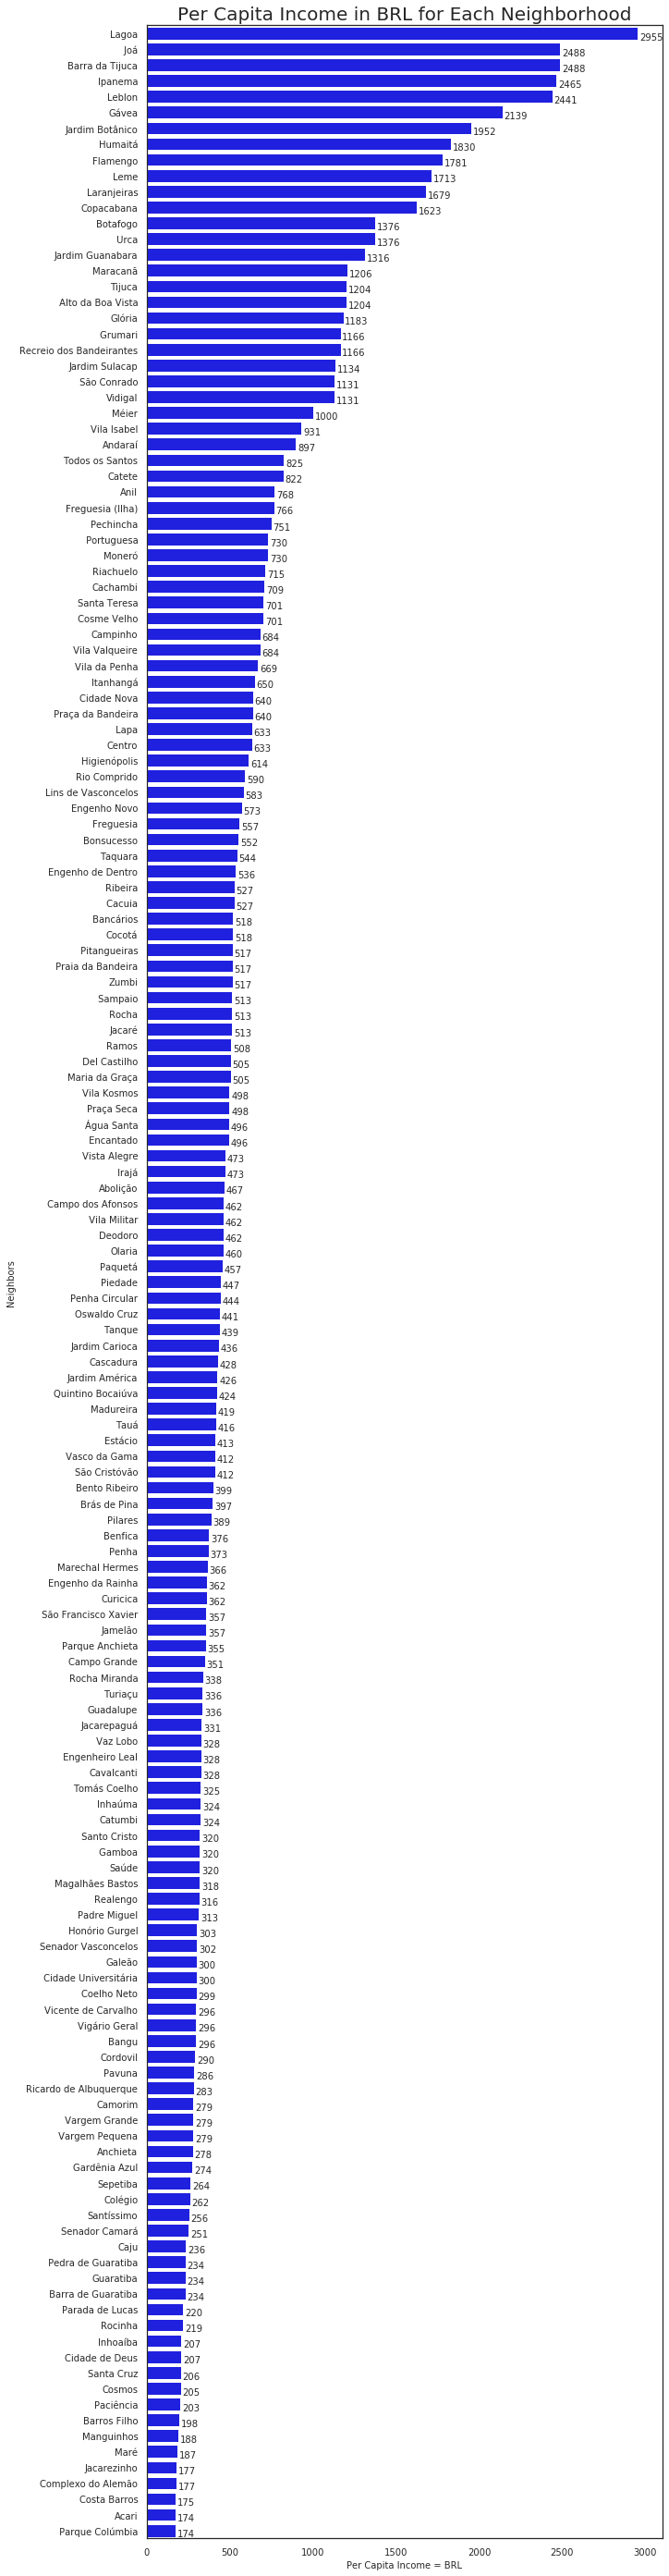

In [59]:
sns.set(style="white")
plt.figure(figsize=(10,50))
plot1 = sns.barplot(data = df_geocoded
            ,y = 'Neighborhood'
            ,x = 'Per Capita Income - BRL'
            ,color = 'blue'
            )
plot1.axes.set_title("Per Capita Income in BRL for Each Neighborhood",fontsize=20)
plot1.set_xlabel("Per Capita Income = BRL",fontsize=10)
plot1.set_ylabel("Neighbors",fontsize=10)
plot1.tick_params(labelsize=10)
show_values_on_bars(plot1, "h", 10)

> __1st Discussion:__ In Rio de Janeiro, most of the people that has higher per capita income lives in the south area of the city and closer to the beach. That explains a lot for example why Copacabana, Ipanema and Leblon are neighborhoods highly looked for tourists to stay when they are in the city. Off course, crime rates in those areas are lower compared to other areas, like the suburb for example.

In [60]:
df_geocoded.head()

,Number,Neighborhood,Per Capita Income - BRL,IDH-L,IDH-E,IDH-R,IDH,Address,location,point,latitude,longitude,altitude,Zones
0,4,Lagoa,2955.0,88.2,99.6,100.0,95.9,"Lagoa, Rio de Janeiro, Brazil","Lagoa, Zona Sul do Rio de Janeiro, Rio de Jane...","(-22.9624658, -43.2024884, 0.0)",-22.962466,-43.202488,0.0,South
1,8,Joá,2488.0,88.1,99.6,100.0,95.9,"Joá, Rio de Janeiro, Brazil","Joá, Zona Oeste do Rio de Janeiro, Rio de Jane...","(-23.0077797, -43.2872344, 0.0)",-23.007780,-43.287234,0.0,West
2,7,Barra da Tijuca,2488.0,88.1,99.6,100.0,95.9,"Barra da Tijuca, Rio de Janeiro, Brazil","Barra da Tijuca, Zona Oeste do Rio de Janeiro,...","(-22.9997404, -43.3659929, 0.0)",-22.999740,-43.365993,0.0,West
3,3,Ipanema,2465.0,89.5,99.2,100.0,96.2,"Ipanema, Rio de Janeiro, Brazil","Ipanema, Zona Sul do Rio de Janeiro, Rio de Ja...","(-22.9839557, -43.2022163, 0.0)",-22.983956,-43.202216,0.0,South
4,1,Leblon,2441.0,90.8,99.3,100.0,96.7,"Leblon, Rio de Janeiro, Brazil","Leblon, Zona Sul do Rio de Janeiro, Rio de Jan...","(-22.983556, -43.2249377, 0.0)",-22.983556,-43.224938,0.0,South


### >> Sorting the data frame by "HDI" and  ploting

In [61]:
df_geocoded = df_geocoded.sort_values(['IDH'],ascending=False).reset_index(drop=True)

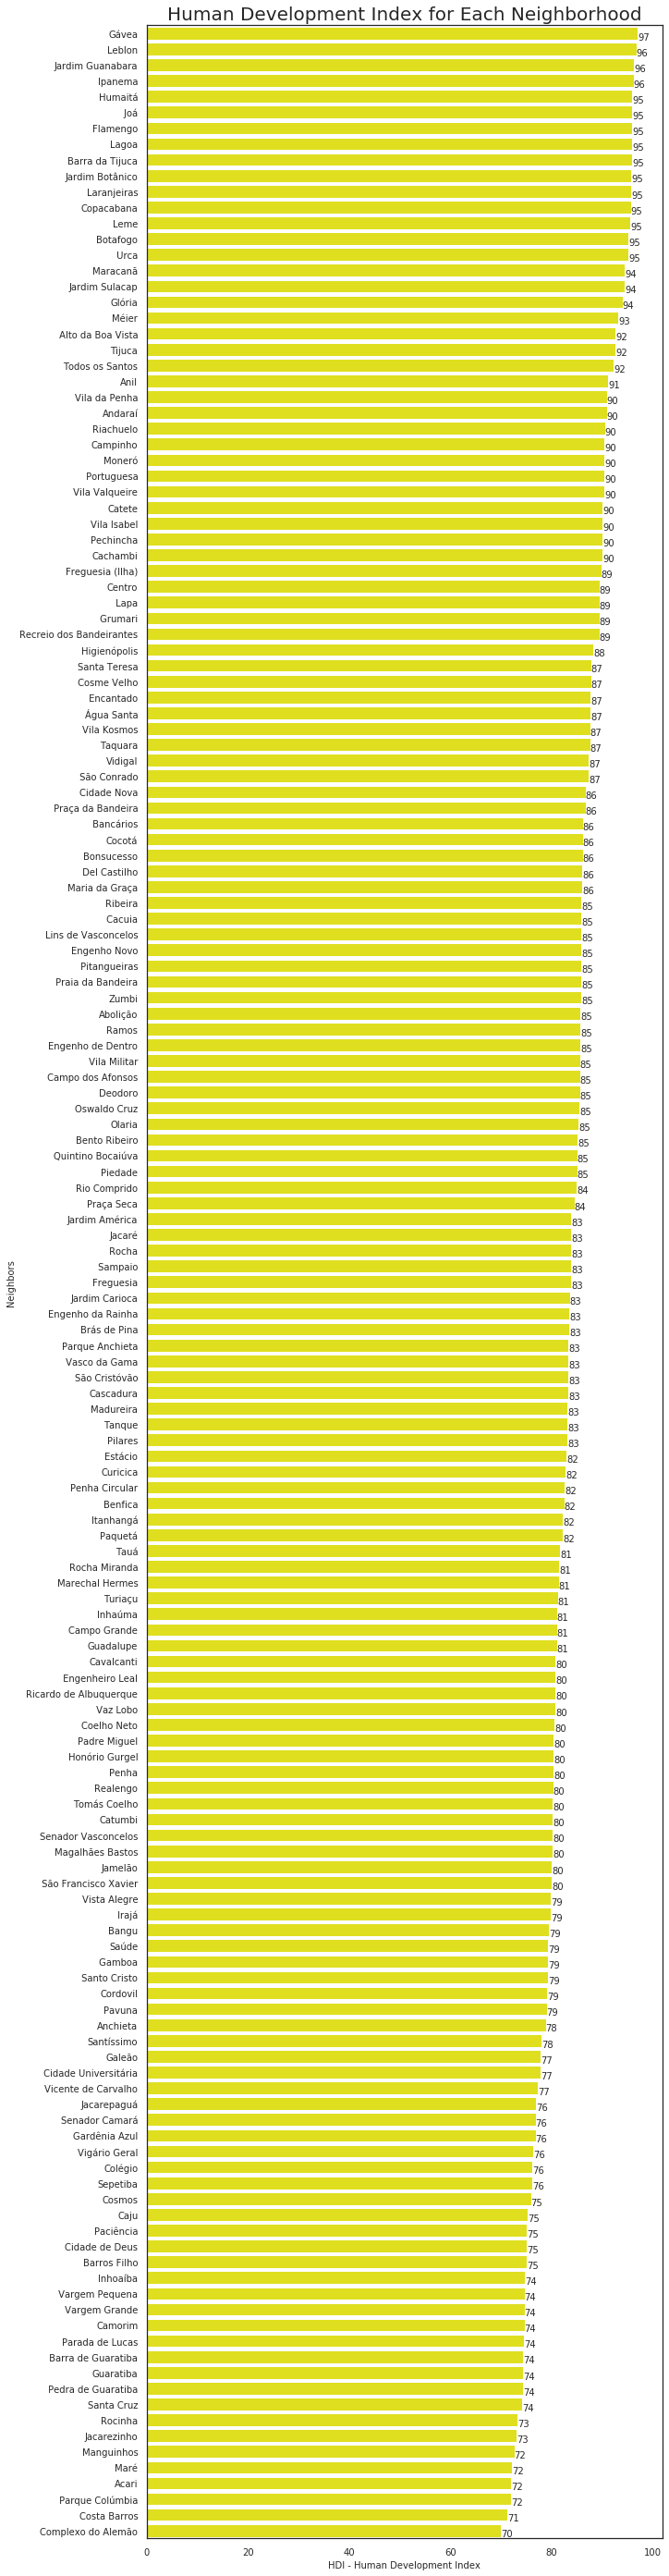

In [62]:
sns.set(style="white")
plt.figure(figsize=(10,50))
plot2 = sns.barplot(data = df_geocoded
            ,y = 'Neighborhood'
            ,x = 'IDH'
            ,color = 'yellow'
            )
plot2.axes.set_title("Human Development Index for Each Neighborhood",fontsize=20)
plot2.set_xlabel("HDI - Human Development Index",fontsize=10)
plot2.set_ylabel("Neighbors",fontsize=10)
plot2.tick_params(labelsize=10)
show_values_on_bars(plot2, "h", 0)

> __2nd Discussion:__ Even with a big difference in per capita income in most of the neighborhoods, the city of Rio de Janeiro has a good Human Development Index and I think some reasons can explain that, two of them are:
>> * 1) The city is not too big, that means most of activities are accessible by most of the people living in the city,
>> * 2) As we can see in the other metrics (figure 3), the education rate and life longevity rate are very good even in areas where the per capita income are low. That values raises the average of the HDI (that is the calculated rate)

In [63]:
df_geocoded.head()

,Number,Neighborhood,Per Capita Income - BRL,IDH-L,IDH-E,IDH-R,IDH,Address,location,point,latitude,longitude,altitude,Zones
0,0,Gávea,2139.0,92.4,98.7,100.0,97.0,"Gávea, Rio de Janeiro, Brazil","Gávea, Zona Sul do Rio de Janeiro, Rio de Jane...","(-22.9814243, -43.2383245, 0.0)",-22.981424,-43.238324,0.0,South
1,1,Leblon,2441.0,90.8,99.3,100.0,96.7,"Leblon, Rio de Janeiro, Brazil","Leblon, Zona Sul do Rio de Janeiro, Rio de Jan...","(-22.983556, -43.2249377, 0.0)",-22.983556,-43.224938,0.0,South
2,2,Jardim Guanabara,1316.0,92.4,99.3,97.2,96.3,"Jardim Guanabara, Rio de Janeiro, Brazil","Jardim Guanabara, Zona Norte do Rio de Janeiro...","(-22.8128362, -43.2007792, 0.0)",-22.812836,-43.200779,0.0,North
3,3,Ipanema,2465.0,89.5,99.2,100.0,96.2,"Ipanema, Rio de Janeiro, Brazil","Ipanema, Zona Sul do Rio de Janeiro, Rio de Ja...","(-22.9839557, -43.2022163, 0.0)",-22.983956,-43.202216,0.0,South
4,6,Humaitá,1830.0,88.2,99.5,100.0,95.9,"Humaitá, Rio de Janeiro, Brazil","Humaitá, Zona Sul do Rio de Janeiro, Rio de Ja...","(-22.9546413, -43.2004797, 0.0)",-22.954641,-43.200480,0.0,South


### >> Creating a data frame to plot and compare the main metrics that compose the HDI rate

In [64]:
df_4plot = df_dropna.drop('Number', 1)
df_4plot = df_4plot.drop('Address', 1)
df_4plot = df_4plot.drop('location', 1)
df_4plot = df_4plot.drop('point', 1)
df_4plot = df_4plot.drop('latitude', 1)
df_4plot = df_4plot.drop('longitude', 1)
df_4plot = df_4plot.drop('altitude', 1)
df_4plot = df_4plot.drop('Per Capita Income - BRL', 1)
df_4plot = df_4plot.drop('Zones', 1)

In [65]:
df_4plot.head()

,Neighborhood,IDH-L,IDH-E,IDH-R,IDH
0,Gávea,92.4,98.7,100.0,97.0
1,Leblon,90.8,99.3,100.0,96.7
2,Jardim Guanabara,92.4,99.3,97.2,96.3
3,Ipanema,89.5,99.2,100.0,96.2
4,Lagoa,88.2,99.6,100.0,95.9


In [66]:
df_transposed = pd.melt(df_4plot, id_vars="Neighborhood", var_name="Metrics", value_name="Metrics Value")
df_transposed

,Neighborhood,Metrics,Metrics Value
0,Gávea,IDH-L,92.4
1,Leblon,IDH-L,90.8
2,Jardim Guanabara,IDH-L,92.4
3,Ipanema,IDH-L,89.5
4,Lagoa,IDH-L,88.2
...,...,...,...
631,Maré,IDH,72.2
632,Acari,IDH,72.0
633,Parque Colúmbia,IDH,72.0
634,Costa Barros,IDH,71.3


### >> Ploting the HDI metrics to compare

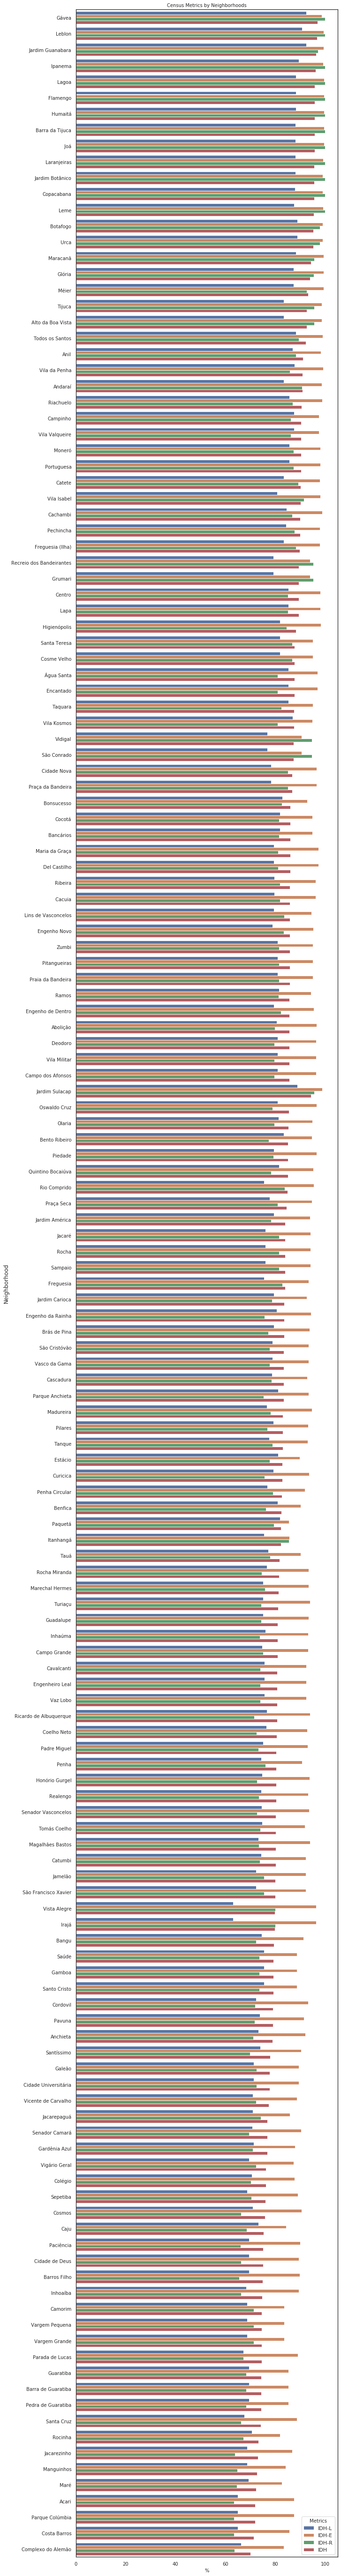

In [67]:
sns.set(style="white")
plt.figure(figsize=(10,100))
plot2 = sns.barplot(data = df_transposed
            ,y = 'Neighborhood'
            ,x = 'Metrics Value'
            ,hue = "Metrics"
            )
plot2.axes.set_title("Census Metrics by Neighborhoods",fontsize=10)
plot2.set_xlabel("%",fontsize=10)
plot2.tick_params(labelsize=10)

> __3rd Discussion:__ As said in the 2nd discussion, the HDI rate (IDH) is heavily influenced by the education rate (IDH-E) that raises the IDH rate average making the neighborhoods having not much difference in HDI. Because the city is not that big, the inequality rate is very high with slums present in almost every neighborhood of the city. In fact, I can conclude the problems that has in the city are not easily saw only looking to HDI metrics but the data is enough to see where people with more acquisition power lives.
>> To a company that is looking to know where to open an english school in Rio de Janeiro, the data is good enough.

In [68]:
df_geocoded.head()

,Number,Neighborhood,Per Capita Income - BRL,IDH-L,IDH-E,IDH-R,IDH,Address,location,point,latitude,longitude,altitude,Zones
0,0,Gávea,2139.0,92.4,98.7,100.0,97.0,"Gávea, Rio de Janeiro, Brazil","Gávea, Zona Sul do Rio de Janeiro, Rio de Jane...","(-22.9814243, -43.2383245, 0.0)",-22.981424,-43.238324,0.0,South
1,1,Leblon,2441.0,90.8,99.3,100.0,96.7,"Leblon, Rio de Janeiro, Brazil","Leblon, Zona Sul do Rio de Janeiro, Rio de Jan...","(-22.983556, -43.2249377, 0.0)",-22.983556,-43.224938,0.0,South
2,2,Jardim Guanabara,1316.0,92.4,99.3,97.2,96.3,"Jardim Guanabara, Rio de Janeiro, Brazil","Jardim Guanabara, Zona Norte do Rio de Janeiro...","(-22.8128362, -43.2007792, 0.0)",-22.812836,-43.200779,0.0,North
3,3,Ipanema,2465.0,89.5,99.2,100.0,96.2,"Ipanema, Rio de Janeiro, Brazil","Ipanema, Zona Sul do Rio de Janeiro, Rio de Ja...","(-22.9839557, -43.2022163, 0.0)",-22.983956,-43.202216,0.0,South
4,6,Humaitá,1830.0,88.2,99.5,100.0,95.9,"Humaitá, Rio de Janeiro, Brazil","Humaitá, Zona Sul do Rio de Janeiro, Rio de Ja...","(-22.9546413, -43.2004797, 0.0)",-22.954641,-43.200480,0.0,South


### > Scatter plots to compare the metrics that compose the HDI rate

### >> IDH (Human Development Index) versus IDH-L (Longevity Life Rate)

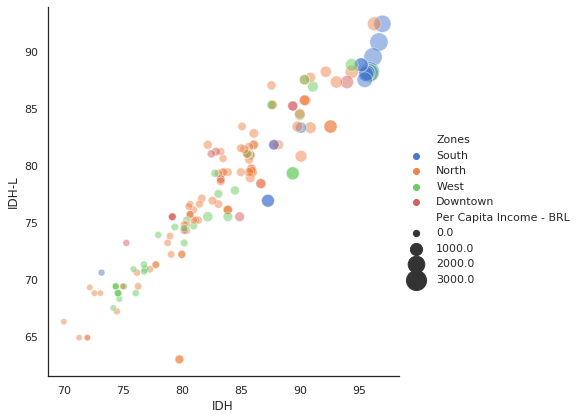

In [69]:
sns.set(style="white")

sns.relplot(x="IDH", y="IDH-L", hue="Zones", size="Per Capita Income - BRL",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df_geocoded)

### >> IDH (Human Development Index) versus IDH-E (Education Rate)

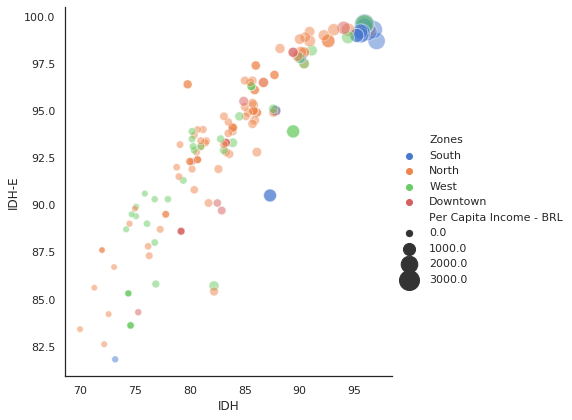

In [70]:
sns.relplot(x="IDH", y="IDH-E", hue="Zones", size="Per Capita Income - BRL",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df_geocoded)

### >> IDH (Human Development Index) versus IDH-R (Income Rate)

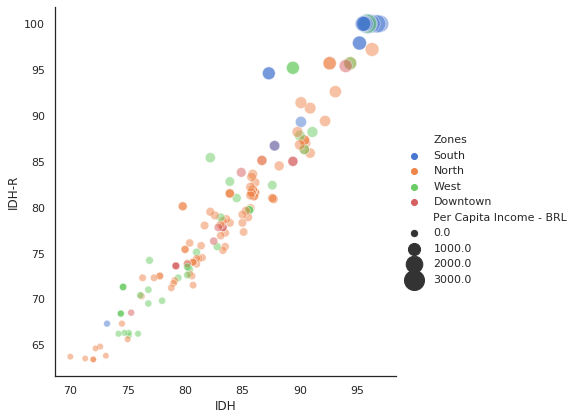

In [71]:
sns.relplot(x="IDH", y="IDH-R", hue="Zones", size="Per Capita Income - BRL",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df_geocoded)

### >> IDH-R (Income Rate) versus IDH-E (Education Rate)

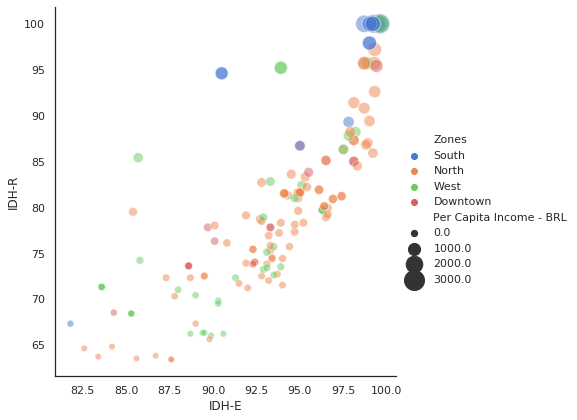

In [72]:
sns.relplot(x="IDH-E", y="IDH-R", hue="Zones", size="Per Capita Income - BRL",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df_geocoded)

### >> IDH-R (Income Rate) versus IDH-L (Longevity Life Rate)

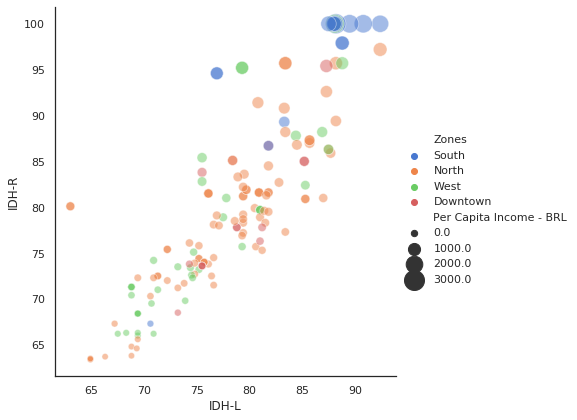

In [73]:
sns.relplot(x="IDH-L", y="IDH-R", hue="Zones", size="Per Capita Income - BRL",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df_geocoded)

### >> IDH-E (Education Rate) versus IDH-L (Longevity Life Rate)

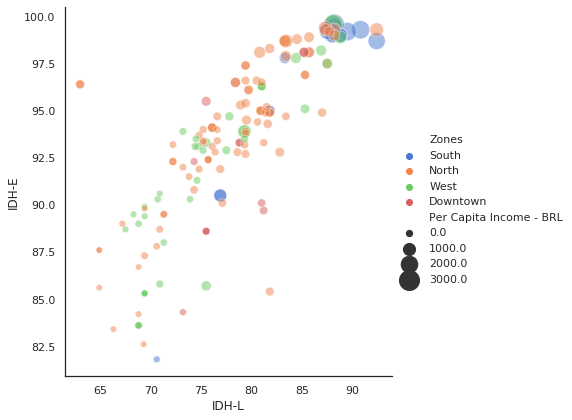

In [74]:
sns.relplot(x="IDH-L", y="IDH-E", hue="Zones", size="Per Capita Income - BRL",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df_geocoded)

> __4th Discussion:__ If we look to those plots searching for inequality we can see the south area is more linear on that. In general, people that lives in the south area have better results in every metrics available and discussed here. The North area has some difference depending on the localization. How far north, worst is the conditions. The Downtown area usualy only have commercial buildings, few people lives there compared to others area. The West zone is similar to the south area only around "Barra da Tijuca". The rest of the west area is more similar to the north area.

### > Boxplots to evaluate how our data is distributed

### >> IDH by Zones

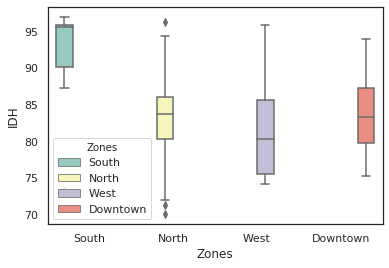

In [75]:
sns.boxplot(x="Zones", y="IDH", hue="Zones",
                 data=df_geocoded, palette="Set3")

### >> Per Capita Income by Zones

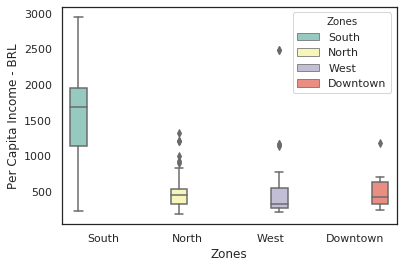

In [76]:
sns.boxplot(x="Zones", y="Per Capita Income - BRL", hue="Zones",
                 data=df_geocoded, palette="Set3")

> __5th Discussion:__ As I suspected before, the distribution of south area is more linear when compared to the other areas. That means the inequality there is concentrated in some small slums around the neighborhoods. The others areas, such West and North has some outliers that comproves they are more unequal. There are some regions (outliers) that maybe have some opportunity there to establish an english school as some neighborhood has the same Per Capita Income and HDI from south area. Off course we will need to set a range for the price of the monthly subscription.

### >> Saving the data frames into csv

In [77]:
df_geocoded.shape

(159, 14)

In [78]:
df_geocoded.to_csv('rj_neighbors_geocoded2.csv', index=False, encoding='UTF-8')

In [79]:
df_4plot.to_csv('rj_neighbors_4plots.csv', index=False, encoding='UTF-8')

In [80]:
df_transposed.to_csv('rj_neighbors_transposed.csv', index=False, encoding='UTF-8')

### >> Finished the data exploration section. The plots above gives some good understood about the regions. From now, we will try to discover where to set up ou first english school from  the English4You franchise in Rio de Janeiro!

___________

## Part 4: Machine Learning - Clustering

______________

### > Will use K-Means to cluster the neighborhoods and try to discover with one has more similarities between them. The focus here is look for neighborhoods that offer good conditions to open an english school. Later, will use the Foursquare API to see if there are any other language school competitor around that can compromise our plan.

### >> Creating our data frame  that will be  used  in  K-Means algorithm. Every categorical column must be droped.

In [81]:
df_4kmeans = df_dropna.drop('Neighborhood', 1)
df_4kmeans = df_4kmeans.drop('Address', 1)
df_4kmeans = df_4kmeans.drop('location', 1)
df_4kmeans = df_4kmeans.drop('point', 1)
df_4kmeans = df_4kmeans.drop('latitude', 1)
df_4kmeans = df_4kmeans.drop('longitude', 1)
df_4kmeans = df_4kmeans.drop('altitude', 1)
df_4kmeans = df_4kmeans.drop('Zones', 1)
df_4kmeans = df_4kmeans.drop('Number', 1)
df_4kmeans.head()

,Per Capita Income - BRL,IDH-L,IDH-E,IDH-R,IDH
0,2139.0,92.4,98.7,100.0,97.0
1,2441.0,90.8,99.3,100.0,96.7
2,1316.0,92.4,99.3,97.2,96.3
3,2465.0,89.5,99.2,100.0,96.2
4,2955.0,88.2,99.6,100.0,95.9


### >> Modeling K-Means clustering

#### >>> I will use only 3 clusters to reproduce the city zones, excluding downtown.

In [82]:
from sklearn.cluster import KMeans 
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_4kmeans)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2], dtype=int32)

### >> Joining the cluster labels to the main data frame

In [83]:
df_geocoded['Cluster Labels'] = kmeans.labels_

In [84]:
df_geocoded.head()

,Number,Neighborhood,Per Capita Income - BRL,IDH-L,IDH-E,IDH-R,IDH,Address,location,point,latitude,longitude,altitude,Zones,Cluster Labels
0,0,Gávea,2139.0,92.4,98.7,100.0,97.0,"Gávea, Rio de Janeiro, Brazil","Gávea, Zona Sul do Rio de Janeiro, Rio de Jane...","(-22.9814243, -43.2383245, 0.0)",-22.981424,-43.238324,0.0,South,1
1,1,Leblon,2441.0,90.8,99.3,100.0,96.7,"Leblon, Rio de Janeiro, Brazil","Leblon, Zona Sul do Rio de Janeiro, Rio de Jan...","(-22.983556, -43.2249377, 0.0)",-22.983556,-43.224938,0.0,South,1
2,2,Jardim Guanabara,1316.0,92.4,99.3,97.2,96.3,"Jardim Guanabara, Rio de Janeiro, Brazil","Jardim Guanabara, Zona Norte do Rio de Janeiro...","(-22.8128362, -43.2007792, 0.0)",-22.812836,-43.200779,0.0,North,0
3,3,Ipanema,2465.0,89.5,99.2,100.0,96.2,"Ipanema, Rio de Janeiro, Brazil","Ipanema, Zona Sul do Rio de Janeiro, Rio de Ja...","(-22.9839557, -43.2022163, 0.0)",-22.983956,-43.202216,0.0,South,1
4,6,Humaitá,1830.0,88.2,99.5,100.0,95.9,"Humaitá, Rio de Janeiro, Brazil","Humaitá, Zona Sul do Rio de Janeiro, Rio de Ja...","(-22.9546413, -43.2004797, 0.0)",-22.954641,-43.200480,0.0,South,1


### >> Visualizing the cluster on the folium map

In [85]:
# Visualize the resulting clusters

# create map
map_clusters = folium.Map(location=centerpoint, zoom_start=12)

# set color scheme for the clusters
cluster_color = {}
for cluster in range(kclusters):
    cluster_color[cluster]= '#%02X%02X%02X' % tuple(np.random.choice(range(256), size=3)) #Random color

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_geocoded['latitude'], 
                                  df_geocoded['longitude'], 
                                  df_geocoded['Neighborhood'], 
                                  df_geocoded['Cluster Labels']):
    label_text = 'Cluster ' + str(cluster) + ' / ' + str(poi)
    label = folium.Popup(label_text, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        tooltip = label_text,
        radius=6,
        popup=label,
        color=cluster_color[cluster],
        fill=True,
        fill_color=cluster_color[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

> __6th Discussion:__ At least, the result is very interesting! Look at the markers on the coast area (those are the south area) that are very asked from tourists to have a stay in RJ.  Off course there are many english schools around and we can check on this later. But,  the most interesting cluster is the "0" (zero) that point some area with similar metrics with good per capita income rate.

In [86]:
is_cluster0 = df_geocoded['Cluster Labels'] == 0

In [87]:
df_cluster0 = df_geocoded[is_cluster0]

In [88]:
df_cluster0.head()

,Number,Neighborhood,Per Capita Income - BRL,IDH-L,IDH-E,IDH-R,IDH,Address,location,point,latitude,longitude,altitude,Zones,Cluster Labels
2,2,Jardim Guanabara,1316.0,92.4,99.3,97.2,96.3,"Jardim Guanabara, Rio de Janeiro, Brazil","Jardim Guanabara, Zona Norte do Rio de Janeiro...","(-22.8128362, -43.2007792, 0.0)",-22.812836,-43.200779,0.0,North,0
13,13,Botafogo,1376.0,88.8,99.0,97.9,95.2,"Botafogo, Rio de Janeiro, Brazil","Botafogo de Futebol e Regatas, Avenida Repórte...","(-22.948844649999998, -43.17982909625297, 0.0)",-22.948845,-43.179829,0.0,South,0
14,14,Urca,1376.0,88.8,99.0,97.9,95.2,"Urca, Rio de Janeiro, Brazil","Urca, Zona Sul do Rio de Janeiro, Rio de Janei...","(-22.954074, -43.1679727, 0.0)",-22.954074,-43.167973,0.0,South,0
15,15,Maracanã,1206.0,88.2,99.3,95.7,94.4,"Maracanã, Rio de Janeiro, Brazil","Maracanã, Avenida Presidente Castelo Branco, M...","(-22.912091949999997, -43.23114540590559, 0.0)",-22.912092,-43.231145,0.0,North,0
16,67,Jardim Sulacap,1134.0,88.8,98.9,95.7,94.4,"Jardim Sulacap, Rio de Janeiro, Brazil","Jardim Sulacap, Zona Oeste do Rio de Janeiro, ...","(-22.8956799, -43.3929967, 0.0)",-22.895680,-43.392997,0.0,West,0


### > Applying a dendrogram into the K-Means cluster 0 to see which neighborhood is more similar inside the given cluster

### >> Creating a data frame only with the metrics to be passed to the dendrogram

In [89]:
df_4dendro = df_cluster0.drop('Neighborhood', 1)
df_4dendro = df_4dendro.drop('Address', 1)
df_4dendro = df_4dendro.drop('location', 1)
df_4dendro = df_4dendro.drop('point', 1)
df_4dendro = df_4dendro.drop('latitude', 1)
df_4dendro = df_4dendro.drop('longitude', 1)
df_4dendro = df_4dendro.drop('altitude', 1)
df_4dendro = df_4dendro.drop('Zones', 1)
df_4dendro = df_4dendro.drop('Cluster Labels', 1)
df_4dendro = df_4dendro.drop('Number', 1)
df_4dendro.head()

,Per Capita Income - BRL,IDH-L,IDH-E,IDH-R,IDH
2,1316.0,92.4,99.3,97.2,96.3
13,1376.0,88.8,99.0,97.9,95.2
14,1376.0,88.8,99.0,97.9,95.2
15,1206.0,88.2,99.3,95.7,94.4
16,1134.0,88.8,98.9,95.7,94.4


### >> A list of labels and an numpy array of the metrics

In [90]:
names = list(df_cluster0["Neighborhood"])

In [91]:
metrics = df_4dendro.to_numpy()

### >> Building the model and ploting the dendrogram clustering

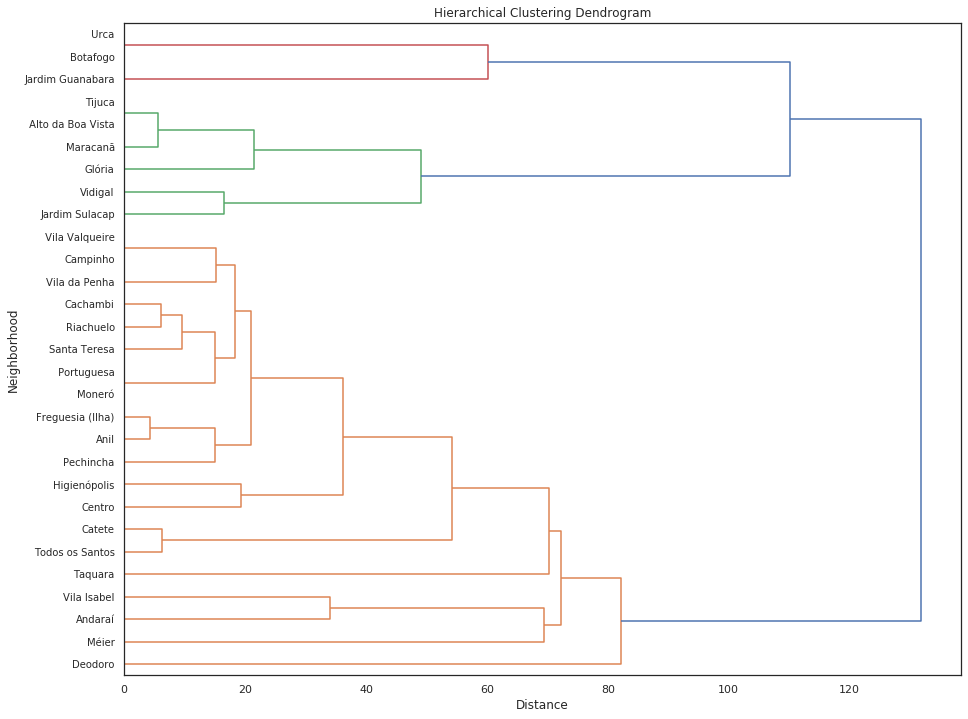

In [92]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(metrics)

plt.figure(figsize=(15, 12))
dendrogram(
            linked,
            orientation='right',
            labels=names,
            distance_sort='descending',
            show_leaf_counts=False
          )
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Distance')
plt.ylabel('Neighborhood')
plt.show()


> __7th Discussion:__ The cluster 0 provided by K-Means was considered the "middle term" of the neighborhood in Rio de Janeiro. They are not totally in the south area that has many competition and the cost to start any business is high (ex: rentals) and they are not in the worse area of the city. To help to understand a bit more, I selected the cluster 0 result and applied a dendrogram to cluster the similar neighborhoods inside the cluster. The result was very good. The dendrogram creates 3 big clusters, the first one on the top is a kind of outlier. Urca and Botafogo are in the south area and it's any square is very disputed. Jardim Guanabara is a a good option as it is not in the south area and most of the people that lives there has good living conditions. The second cluster is a good option too, excluding Jardim Sulacap and Vidigal. The first one is too far from downtown and it's a kind of army village and the second one is a slum located in the south area. The other ones: Tijuca, Maracanã, Alto da Boa Vista and Glória can be considered a good option to start the business.

>> So, at leat the following neighborhoods will be considered to start the language school:
>> * Jardim Guanabara
>> * Maracanã
>> * Tijuca
>> * Alto da Boa Vista
>> * Glória

### >> Saving the results and data frames

In [93]:
df_geocoded.to_csv('rj_neighbors_geocoded3.csv', index=False, encoding='UTF-8')

In [94]:
df_4kmeans.to_csv('rj_neighbors_4kmeans.csv', index=False, encoding='UTF-8')

In [95]:
df_cluster0.to_csv('rj_neighbors_cluster0.csv', index=False, encoding='UTF-8')

In [96]:
df_4dendro.to_csv('rj_neighbors_4dendro.csv', index=False, encoding='UTF-8')

_______

## Part 5: Venues Evaluation using the Foursquare API

________

>> From now, I will focus on evaluate venues using the Foursquare API loooking for competition (other schools) and try to see which neighborhoods between the previous ones selected has more infrastructure to support the future customers.

### >> Creating a data frame that only has the chosen neighborhoods

In [97]:
df_filtered4Fsq = df_cluster0[(df_cluster0["Number"] == 2) | (df_cluster0["Number"] == 15 ) 
                              | (df_cluster0["Number"] == 16 ) | (df_cluster0["Number"] == 19 ) | (df_cluster0["Number"] == 18 )]

In [98]:
df_filtered4Fsq.head()

,Number,Neighborhood,Per Capita Income - BRL,IDH-L,IDH-E,IDH-R,IDH,Address,location,point,latitude,longitude,altitude,Zones,Cluster Labels
2,2,Jardim Guanabara,1316.0,92.4,99.3,97.2,96.3,"Jardim Guanabara, Rio de Janeiro, Brazil","Jardim Guanabara, Zona Norte do Rio de Janeiro...","(-22.8128362, -43.2007792, 0.0)",-22.812836,-43.200779,0.0,North,0
15,15,Maracanã,1206.0,88.2,99.3,95.7,94.4,"Maracanã, Rio de Janeiro, Brazil","Maracanã, Avenida Presidente Castelo Branco, M...","(-22.912091949999997, -43.23114540590559, 0.0)",-22.912092,-43.231145,0.0,North,0
17,16,Glória,1183.0,87.3,99.4,95.4,94.0,"Glória, Rio de Janeiro, Brazil","Glória, Zona Central do Rio de Janeiro, Rio de...","(-22.9183225, -43.1739232, 0.0)",-22.918323,-43.173923,0.0,Downtown,0
19,19,Alto da Boa Vista,1204.0,83.4,98.7,95.7,92.6,"Alto da Boa Vista, Rio de Janeiro, Brazil","Alto da Boa Vista, Zona Norte do Rio de Janeir...","(-22.9621126, -43.2535816, 0.0)",-22.962113,-43.253582,0.0,North,0
20,18,Tijuca,1204.0,83.4,98.7,95.7,92.6,"Tijuca, Rio de Janeiro, Brazil","Tijuca, Zona Norte do Rio de Janeiro, Rio de J...","(-22.9332164, -43.2381453, 0.0)",-22.933216,-43.238145,0.0,North,0


### >> Creating a connection to the Foursquare API

In [99]:
CLIENT_ID = 'XXX'
CLIENT_SECRET = 'XXX'
VERSION = '20180605'

In [100]:
def getNearbyVenues(names, latitudes, longitudes, radius=6000, limit = 200):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID,
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### >> Get venues for all neighborhoods in the filtered data frame

In [101]:
rj_filtered_venues = getNearbyVenues(names=df_filtered4Fsq['Neighborhood'],
                                latitudes=df_filtered4Fsq['latitude'],
                                longitudes=df_filtered4Fsq['longitude'])

Jardim Guanabara


KeyError: 'groups'

In [ ]:
# Check size of resulting dataframe
rj_filtered_venues.shape

### >> Checking the returned venues from the Foursquare API

In [ ]:
pd.set_option('display.max_rows', 500)
rj_filtered_venues.head()

In [ ]:
# Number of venues per neighborhood
rj_filtered_venues.groupby('Neighborhood').count()

In [ ]:
# Number of unique venue categories
print('There are {} uniques categories.'.format(len(rj_filtered_venues['Venue Category'].unique())))

### >> One hot encoding to the venues data frame

In [ ]:
# one hot encoding
rj_onehot = pd.get_dummies(rj_filtered_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
rj_onehot['Neighborhood'] = rj_filtered_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [rj_onehot.columns[-1]] + list(rj_onehot.columns[:-1])
rj_onehot = rj_onehot[fixed_columns]

rj_onehot.head()

### >> Shaping data frame with venues

In [ ]:
# Dataframe shape
rj_onehot.shape

### >> Grouping the venues catagories by neighborhood

In [ ]:
rj_grouped = rj_onehot.groupby('Neighborhood').mean().reset_index()
rj_grouped

### >> New data frame size after grouping

In [ ]:
rj_grouped.shape

### >> A function to sort the most common venues in descending order

In [ ]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = rj_grouped['Neighborhood']

for ind in np.arange(rj_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(rj_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

> __8th Discussion:__ As it is possible to see in the data frame above, in the 10 most frequents venues does not have any language school that can be a competitor against my customer. That's cool! Any of this neighborhood probably is a good location to start their business. To help to choose one location we will consider some human experience about the city and the neighborhoods. But, before that, i will check if there are any language school that it is not fitted in the tens and do some other checks looking for better infrastructure such metros, trams and restaurants.

### >> Transposing the data frame to better visualization

In [ ]:
rj_grouped.set_index('Neighborhood',inplace=True)
rj_grouped_t = rj_grouped.transpose()

In [ ]:
rj_grouped_t.head()

### > According to the Foursquare API documentation, there is a category named "Language School" that can be usefull here. The radius is 6000m around the central point defined by the LAT/LONG
* ### __Language School__ (52e81612bcbc57f1066b7a48)

_______________

* #### Checking for other language schools around

In [ ]:
rj_grouped_t[rj_grouped_t.index == "Language Schools"].reset_index(drop=True)

> ##### No one was returned by the Foursquare API

* #### Checking for transportation

In [ ]:
rj_grouped_t[rj_grouped_t.index == "Tram Station"].reset_index(drop=True)

> ##### Maracanã and Glória has stations

* #### Checking for restaurants around

In [ ]:
rj_check_rests = rj_grouped_t[rj_grouped_t.index.str.contains("Restaurant")]

In [ ]:
rj_check_rests.loc['Grand Total', :] = rj_check_rests.sum()

In [ ]:
rj_check_rests

> ##### Every neighborhood has good quantity of restaurants

> __9th Discussion:__ Only to clarify the results above, following some considerations about the neighborhoods:
> * No english schools registered in the Foursquare API for those selected neighborhoods
>> * But maybe there are some that is not registered in the Foursquare API (need a better check using other API or data source)
> * Maracanã and Glória has some Tram Stations
>> * Quick note on this: Tijuca, Glória and Maracanã already have metro and train stations that wasn't returned by the Foursquare API
> * All of the selected neighborhoods has good restaurants to serve our customers during the classes period

__________

## Part 6: Conclusion

_________________

### Our Customer will be advised that three of the selected neighborhoods are good options to start their first english school in Rio de Janeiro according to the data source evaluated, they are:

* ### 1st: Glória
** #### Glória is the 1st option because it is closer to the downtown and for people that works every day in offices, the proximity can be a good differential compared to the other neighborhoods. Glória is part of the south area of the city but because of the proximity with downtown the rental prices are not too high.

>>> <img src="rio_marina_gloria.jpg" width="600" height="200">

##### A picture from "Marina da Glória" a bay area from the neighborhood

* ### 2nd: Tijuca
** #### Tijuca is the 2nd option because it is the neighborhood in the north area that is more traditional. It is served by metro stations, the percapita income is similar with some neighborhoods of the south area (including Glória). The only cons is the distance from downtown compared to Glória.

>>> <img src="tijuca.jpg" width="600" height="200">

##### A picture from "Tijuca" Neighborhood

* ### 3rd: Jardim Guanabara
** #### Jardim Guanabara is the 3rd options because is too far from downtown and it is not good on transportations (only taxis and buses in there). The per capita income there is one of the best in the city also the HDI rate. It is a good option but only for people that lives there.

>>> <img src="jardim.jpg" width="600" height="200">

##### A picture from a beach named "Praia da Bica" from Jardim Guanabara

### This is the conclusion of the IBM Data Science Applied Capstone!